### Descripción y Código Paso a Paso

#### 1. Instalación de Bibliotecas
**Descripción:**
Instalación de las bibliotecas necesarias usando `pip`.

In [41]:
# Instalación de bibliotecas
!pip install pycaret
!pip install imbalanced-learn
!pip install xgboost

#### 2. Importación de Bibliotecas
**Descripción:**
Importación de todas las bibliotecas necesarias para la exploración de datos, preprocesamiento, modelado y evaluación.


In [42]:
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #aqui falta scipy, os, datetime,
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import learning_curve
warnings.filterwarnings("ignore")
from pycaret.classification import *
from pycaret.classification import setup, compare_models

#### 3. Cargar el Conjunto de Datos
**Descripción:**
Cargar el conjunto de datos desde un archivo CSV.

In [43]:
# Cargar el conjunto de datos
!git clone https://github.com/aconeop/monografia_udea.git
df = pd.read_csv('/content/monografia_udea/new/data.csv')

fatal: destination path 'monografia_udea' already exists and is not an empty directory.


#### 4. Exploración y Preprocesamiento de Datos
Exploración inicial y preprocesamiento del conjunto de datos.

In [44]:
## Vista preliminar de los datos
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN




*   Una descripcion simple del set de datos



In [45]:
## Descripción estadística del conjunto de datos
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN



*   Exploracion general del las variables

In [46]:
## Información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5


*   Validacion de las dimenciones dela matrix de datos

In [47]:
## Dimensiones del DataFrame
print("Dimensiones del DataFrame:", df.shape)

Dimensiones del DataFrame: (569, 33)


*   Validacion de las columnas del set de datos

In [48]:
## Columnas del DataFrame
print("Columnas del DataFrame:", df.columns)

Columnas del DataFrame: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')




*   Comprobacion de valores nulos



In [49]:
## Verificación de valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())

Valores nulos por columna:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dim



*   Depuracion de columnas vacias




In [50]:
## Eliminación de columnas innecesarias
df.drop('Unnamed: 32', axis=1, inplace=True)



*   Validacion de los tipos de datos de cada variable



In [51]:
# Verificación del tipo de datos actual
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     



*   Determinacion de la longitud de cada variable



In [52]:
# Diccionario para almacenar la longitud máxima encontrada en cada columna
max_lengths = {}

# Iterar sobre cada columna del DataFrame
for column in df.columns:
    # Calcular la longitud máxima de los valores en la columna actual
    max_length = df[column].astype(str).apply(len).max()
    # Almacenar la longitud máxima en el diccionario
    max_lengths[column] = max_length

# Imprimir la longitud máxima encontrada en cada columna
for column, max_length in max_lengths.items():
    print(f"Columna '{column}'--> Máximo de dígitos = {max_length}")

Columna 'id'--> Máximo de dígitos = 9
Columna 'diagnosis'--> Máximo de dígitos = 1
Columna 'radius_mean'--> Máximo de dígitos = 5
Columna 'texture_mean'--> Máximo de dígitos = 5
Columna 'perimeter_mean'--> Máximo de dígitos = 5
Columna 'area_mean'--> Máximo de dígitos = 6
Columna 'smoothness_mean'--> Máximo de dígitos = 7
Columna 'compactness_mean'--> Máximo de dígitos = 7
Columna 'concavity_mean'--> Máximo de dígitos = 9
Columna 'concave points_mean'--> Máximo de dígitos = 8
Columna 'symmetry_mean'--> Máximo de dígitos = 6
Columna 'fractal_dimension_mean'--> Máximo de dígitos = 7
Columna 'radius_se'--> Máximo de dígitos = 6
Columna 'texture_se'--> Máximo de dígitos = 6
Columna 'perimeter_se'--> Máximo de dígitos = 6
Columna 'area_se'--> Máximo de dígitos = 5
Columna 'smoothness_se'--> Máximo de dígitos = 8
Columna 'compactness_se'--> Máximo de dígitos = 8
Columna 'concavity_se'--> Máximo de dígitos = 9
Columna 'concave points_se'--> Máximo de dígitos = 8
Columna 'symmetry_se'--> Máxim



*   Convierto variable ```'id'``` en ```(int32)``` y ```'diagnosis'``` que es categorica ```(srt/object)```, el resto de columnas que son de tipo ```float64```, las paso a ```float32``` para optimizar rendimiento en memoria.



In [53]:
# Convertir las columnas a tipos de datos adecuados
df['diagnosis'] = (df['diagnosis'] == 'M').astype('int8')
df['id'] = df['id'].astype('int32')
num_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
            'smoothness_mean', 'compactness_mean', 'concavity_mean',
            'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
            'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
            'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
            'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
            'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
df[num_cols] = df[num_cols].astype('float32')



*   Verificacion de campos ajustados



In [54]:
df.dtypes

id                           int32
diagnosis                     int8
radius_mean                float32
texture_mean               float32
perimeter_mean             float32
area_mean                  float32
smoothness_mean            float32
compactness_mean           float32
concavity_mean             float32
concave points_mean        float32
symmetry_mean              float32
fractal_dimension_mean     float32
radius_se                  float32
texture_se                 float32
perimeter_se               float32
area_se                    float32
smoothness_se              float32
compactness_se             float32
concavity_se               float32
concave points_se          float32
symmetry_se                float32
fractal_dimension_se       float32
radius_worst               float32
texture_worst              float32
perimeter_worst            float32
area_worst                 float32
smoothness_worst           float32
compactness_worst          float32
concavity_worst     

#### 5. Análisis Exploratorio de Datos
**Descripción:**
Análisis de la matriz de correlación y estadísticas resumidas, y visualización de estos análisis.

In [55]:
## Matriz de correlación
columnas_numericas = df.select_dtypes(include=['float32', 'int8'])
# Calcular la matriz de correlación
correlacion = columnas_numericas.corr()
print("Matriz de correlación:\n", correlacion)



Matriz de correlación:
                          diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radi

In [56]:
## Estadísticas resumidas
summary_stats = df.describe(include=['float32'])
print("Resumen de estadísticas:\n")
summary_stats

Resumen de estadísticas:



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289650,91.969032,654.889038,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269192,25.677223,107.261215,880.583130,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914124,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833241,6.146257,33.602543,569.356995,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790001,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.199997,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.169998,420.299988,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110001,515.299988,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.239998,551.099976,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660004,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.799999,104.099998,782.700012,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790001,29.719999,125.400002,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110001,39.279999,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040001,49.540001,251.199997,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [57]:
## Visualización de estadísticas resumidas
print("Resumen de estadísticas:")
from tabulate import tabulate
table_data = summary_stats.values.tolist()
headers = summary_stats.columns.tolist()
print(tabulate(table_data, headers=headers, tablefmt='pretty'))

Resumen de estadísticas:
+--------------------+--------------------+--------------------+--------------------+----------------------+----------------------+----------------------+----------------------+---------------------+------------------------+---------------------+--------------------+--------------------+--------------------+-----------------------+----------------------+----------------------+----------------------+----------------------+-----------------------+--------------------+--------------------+--------------------+-------------------+---------------------+----------------------+---------------------+----------------------+---------------------+-------------------------+
|    radius_mean     |    texture_mean    |   perimeter_mean   |     area_mean      |   smoothness_mean    |   compactness_mean   |    concavity_mean    | concave points_mean  |    symmetry_mean    | fractal_dimension_mean |      radius_se      |     texture_se     |    perimeter_se    |      area_se   

In [58]:
## Distribución de clases
class_distribution = df['diagnosis'].value_counts()
print("Distribución de clases:\n", class_distribution)

Distribución de clases:
 diagnosis
0    357
1    212
Name: count, dtype: int64


#### 6. Visualización de Datos
**Descripción:**
Generar diferentes gráficos para visualizar las características del conjunto de datos.

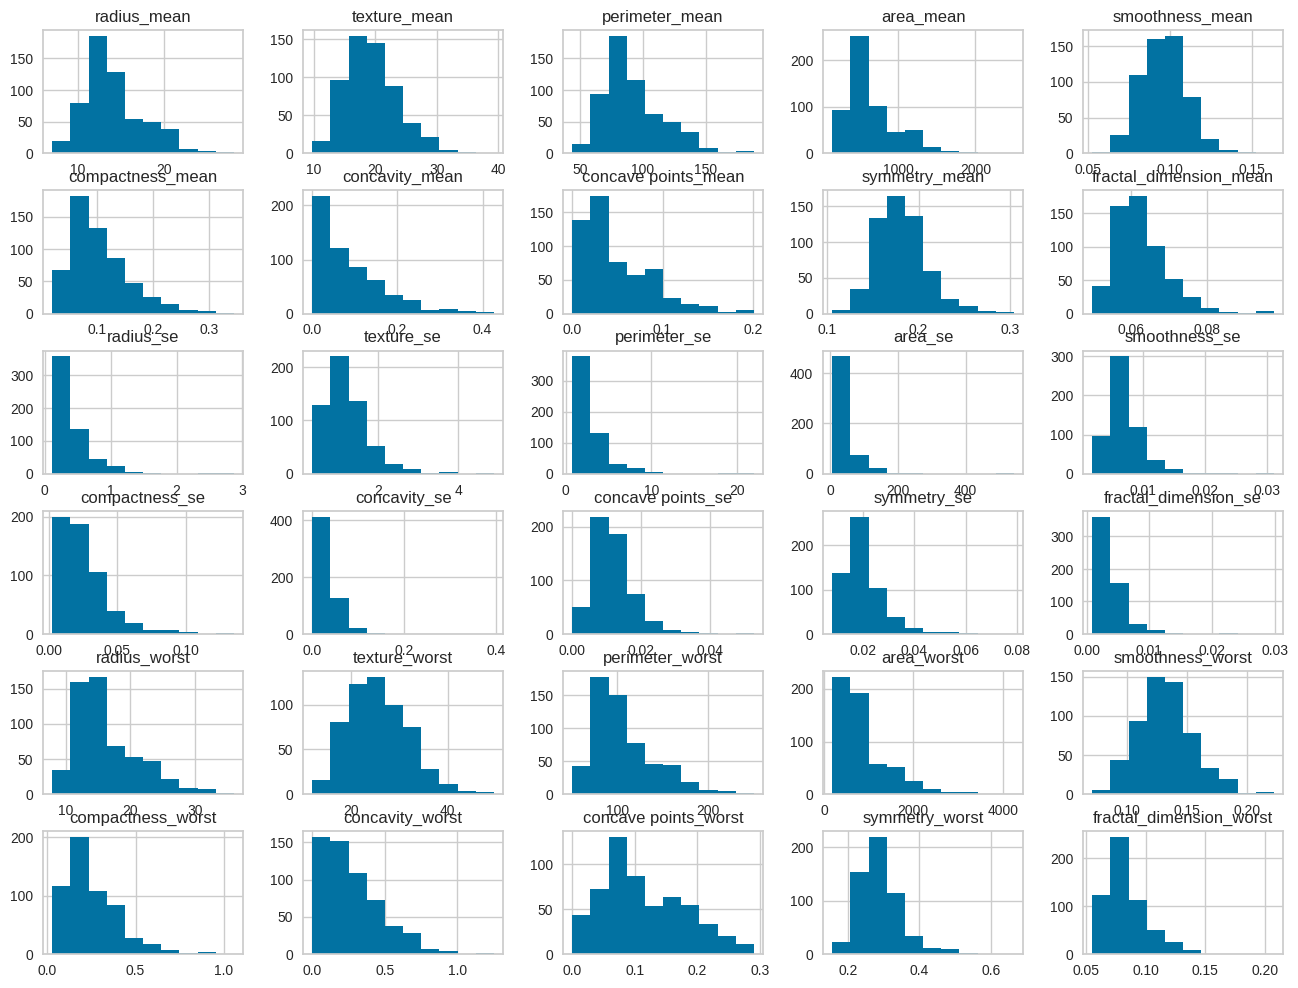

In [59]:
## Histogramas de características numéricas
df[num_cols].hist(figsize=(16, 12))
plt.show()


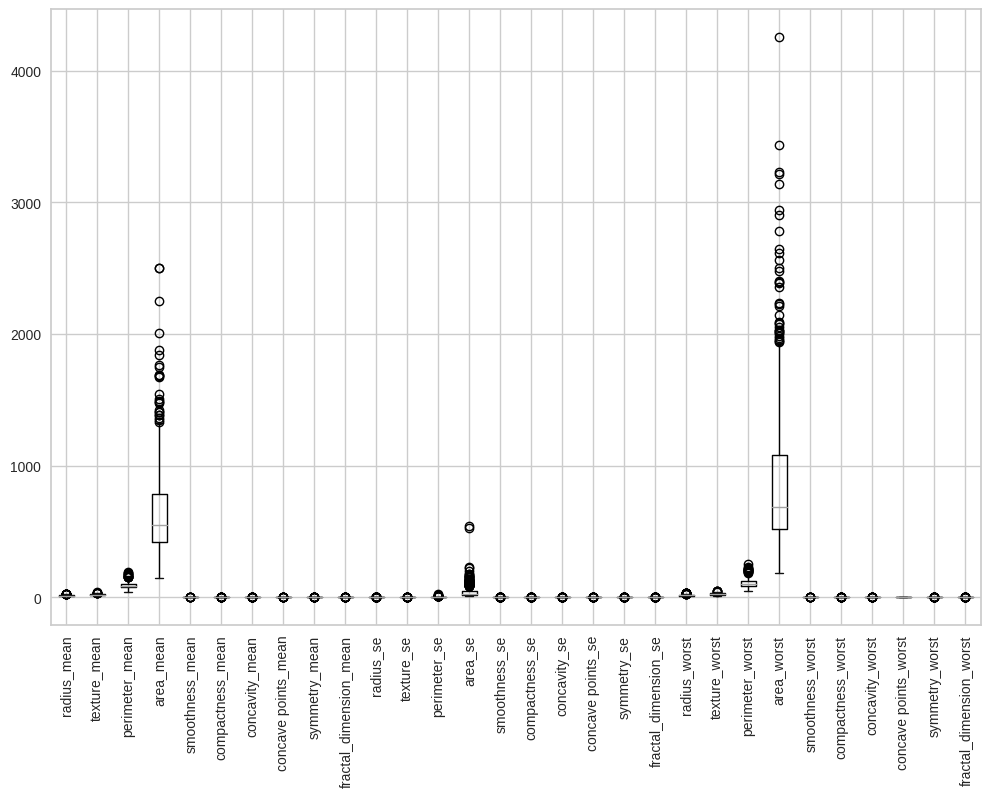

In [60]:
## Gráficos de caja (boxplots)
df[num_cols].boxplot(figsize=(12, 8), rot=90)
plt.show()




*   Grafico de distribucion entre grupos segun ```diagnosis``` (Maligno/Benigno)



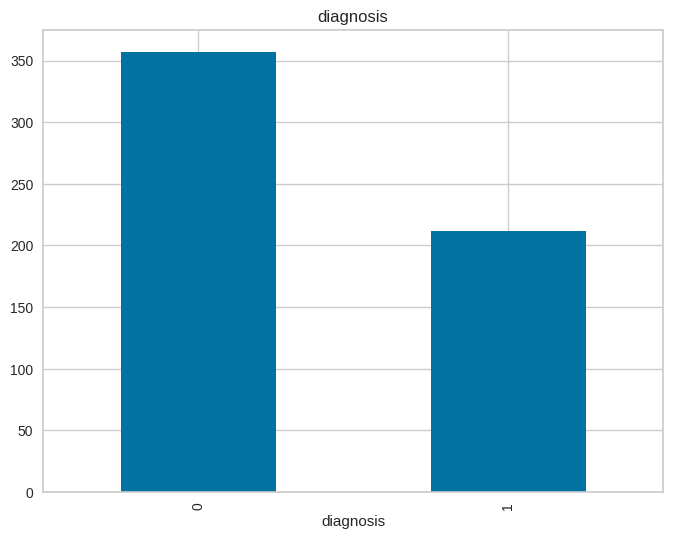

In [61]:
## Gráficos de barras para variables categóricas
categorical_columns = df.select_dtypes(include=['int8']).columns
for column in categorical_columns:
    df[column].value_counts().plot(kind='bar', figsize=(8, 6), title=column)
    plt.show()



*   Tabla de contingencia para variable ```diagnosis```



In [62]:
# Tabla de contingencia
for column in categorical_columns:
    print(f"Tabla de contingencia para la columna '{column}':")
    contingency_table = pd.crosstab(df['diagnosis'], df[column])
    contingency_table = contingency_table.sort_values(by='diagnosis', ascending=False)
    contingency_table = contingency_table.style.set_caption(f'Tabla de contingencia para la columna "{column}"')
    contingency_table = contingency_table.format("{:,}")
    display(contingency_table)

Tabla de contingencia para la columna 'diagnosis':


diagnosis,0,1
diagnosis,,
1,0,212
0,357,0


*   Una forma mas visual de comprender esta distribucion:



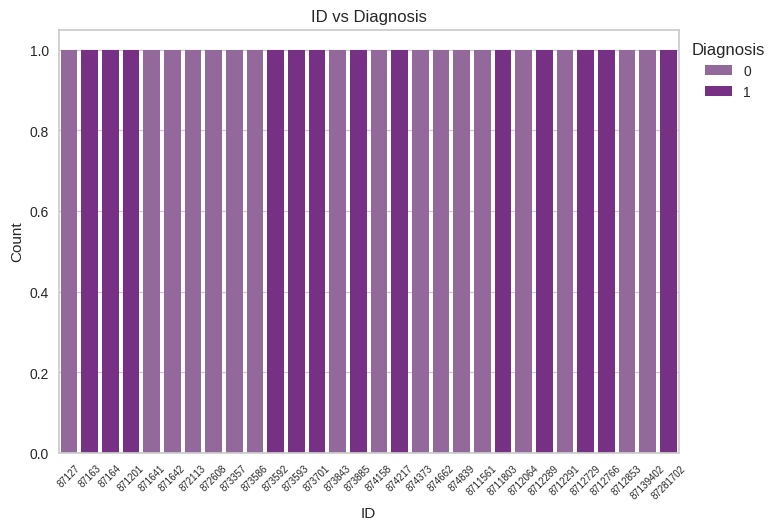

In [63]:
custom_palette = ["#995FA3", "#802392"]
sns.countplot(x="id", hue="diagnosis", data=df[160:190], palette=custom_palette)

plt.title("ID vs Diagnosis", fontsize=12)
plt.xlabel("ID")
plt.ylabel("Count")
plt.xticks(rotation=45, fontsize=7)
plt.legend(title="Diagnosis", labels=["0", "1"], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### 7. Establecimiento de caracteriscas y variable objetivo


In [64]:
# Normalización de los datos
#scaler = StandardScaler()
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
#X_scaled = scaler.fit_transform(X)

#### 8. Separación de Datos
**Descripción:**
División del conjunto de datos en conjuntos de entrenamiento y prueba.

In [65]:
# Separación de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#### 9. Balanceo de Clases
**Descripción:**
Uso de NearMiss para balancear las clases en el conjunto de entrenamiento.

In [66]:
# Balanceo de clases usando NearMiss, Metodo undersampling
nm = NearMiss()
X_resampled_nm, y_resampled_nm = nm.fit_resample(X_train, y_train)

In [67]:
# Balanceo de clases usando SMOTE, Metodo oversampling
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)



*   Verificacion tamano de cada grupo de datos original



In [68]:
print("Número de muestras en X_train:",len(X_train))
print("Número de muestras en X_test:", len(X_test))
print("Número de muestras en y_train:",len(y_train))
print("Número de muestras en y_test:", len(y_test))

Número de muestras en X_train: 426
Número de muestras en X_test: 143
Número de muestras en y_train: 426
Número de muestras en y_test: 143


#### 10. Modelado con PyCaret
**Descripción:**
Uso de PyCaret para probar diferentes modelos de clasificación y encontrar el mejor modelo.

In [69]:
# Concatenar las características de entrenamiento y la variable objetivo de entrenamiento
df_train_original = pd.concat([X_train, y_train], axis=1)

In [70]:
# Concatenar las características de entrenamiento y la variable objetivo de entrenamiento - datos remuestreado con NearMiss
df_train_nm = pd.concat([pd.DataFrame(X_resampled_nm, columns=X.columns), pd.Series(y_resampled_nm, name='diagnosis')], axis=1)

In [71]:
# Concatenar las características de entrenamiento y la variable objetivo de entrenamiento - datos remuestreado con SMOTE
df_train_smote = pd.concat([pd.DataFrame(X_resampled_smote, columns=X.columns), pd.Series(y_resampled_smote, name='diagnosis')], axis=1)


Función para configurar PyCaret y comparar modelos:

In [72]:
def setup_and_compare(df, description):
    print(f"\nResultados con {description}:")
    s = setup(data=df, target='diagnosis', session_id=79, verbose=False)
    best = compare_models()
    print("Initial data shape:", df_train_original.shape)
    print("Transformed train set shape:", s.X_train.shape)
    print("Transformed test set shape:", s.X_test.shape)
    return s


Configurar PyCaret con el conjunto de datos original:

In [73]:
s_original = setup_and_compare(df_train_original, "el conjunto de datos original")



Resultados con el conjunto de datos original:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9632,0.9876,0.9379,0.9635,0.9497,0.9207,0.9219,0.3330
ridge,Ridge Classifier,0.9499,0.9806,0.8841,0.9833,0.9289,0.8906,0.8959,0.0790
qda,Quadratic Discriminant Analysis,0.9498,0.9750,0.9295,0.9379,0.9332,0.8930,0.8936,0.0600
lightgbm,Light Gradient Boosting Machine,0.9495,0.9806,0.8924,0.9718,0.9293,0.8902,0.8933,0.6450
gbc,Gradient Boosting Classifier,0.9466,0.9773,0.9015,0.9552,0.9263,0.8844,0.8867,0.7870
et,Extra Trees Classifier,0.9466,0.9848,0.8917,0.9644,0.9253,0.8838,0.8867,0.4250
lda,Linear Discriminant Analysis,0.9397,0.9844,0.8667,0.9727,0.9142,0.8683,0.8741,0.0810
rf,Random Forest Classifier,0.9364,0.9792,0.8924,0.9398,0.9132,0.8631,0.8666,0.4590
ada,Ada Boost Classifier,0.9260,0.9664,0.8833,0.9235,0.9000,0.8414,0.8451,0.4710
lr,Logistic Regression,0.9125,0.9573,0.8477,0.9182,0.8751,0.8087,0.8163,0.0630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Initial data shape: (426, 32)
Transformed train set shape: (298, 31)
Transformed test set shape: (128, 31)


Configurar PyCaret con el conjunto de datos remuestreado con NearMiss:

In [74]:
s_nm = setup_and_compare(df_train_nm, "el conjunto de datos remuestreado con NearMiss")



Resultados con el conjunto de datos remuestreado con NearMiss:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9508,0.9937,0.9553,0.9496,0.9508,0.9016,0.9047,0.0370
et,Extra Trees Classifier,0.9506,0.9931,0.9553,0.9483,0.9509,0.9012,0.9029,0.2240
ridge,Ridge Classifier,0.9466,0.9840,0.9205,0.9718,0.9441,0.8934,0.8966,0.0450
xgboost,Extreme Gradient Boosting,0.9462,0.9864,0.9470,0.9477,0.9466,0.8926,0.8939,0.1350
lightgbm,Light Gradient Boosting Machine,0.9462,0.9851,0.9470,0.9477,0.9466,0.8926,0.8939,1.3290
lr,Logistic Regression,0.9377,0.9778,0.9386,0.9392,0.9379,0.8757,0.8775,0.1510
lda,Linear Discriminant Analysis,0.9377,0.9839,0.8841,0.9900,0.9322,0.8753,0.8823,0.0430
ada,Ada Boost Classifier,0.9374,0.9857,0.9470,0.9323,0.9383,0.8749,0.8775,0.1530
rf,Random Forest Classifier,0.9328,0.9889,0.9295,0.9385,0.9324,0.8658,0.8686,0.2130
gbc,Gradient Boosting Classifier,0.9192,0.9809,0.9295,0.9154,0.9205,0.8386,0.8420,0.2760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Initial data shape: (426, 32)
Transformed train set shape: (222, 31)
Transformed test set shape: (96, 31)


Configurar PyCaret con el conjunto de datos remuestreado con SMOTE:

In [75]:
s_smote = setup_and_compare(df_train_smote, "el conjunto de datos remuestreado con SMOTE")



Resultados con el conjunto de datos remuestreado con SMOTE:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9652,0.9961,0.9518,0.9789,0.9642,0.9304,0.9324,0.2280
xgboost,Extreme Gradient Boosting,0.9651,0.9946,0.9623,0.9700,0.9646,0.9303,0.9330,0.1510
lightgbm,Light Gradient Boosting Machine,0.9624,0.9904,0.9570,0.9692,0.9620,0.9249,0.9269,0.9640
ada,Ada Boost Classifier,0.9600,0.9893,0.9520,0.9686,0.9591,0.9200,0.9222,0.1840
qda,Quadratic Discriminant Analysis,0.9570,0.9845,0.9567,0.9585,0.9566,0.9140,0.9160,0.0390
rf,Random Forest Classifier,0.9544,0.9940,0.9465,0.9649,0.9538,0.9089,0.9123,0.2320
ridge,Ridge Classifier,0.9543,0.9911,0.9295,0.9775,0.9518,0.9085,0.9113,0.0390
gbc,Gradient Boosting Classifier,0.9491,0.9912,0.9465,0.9559,0.9490,0.8982,0.9024,0.6480
lda,Linear Discriminant Analysis,0.9490,0.9937,0.9249,0.9727,0.9469,0.8980,0.9011,0.0500
dt,Decision Tree Classifier,0.9356,0.9364,0.9468,0.9315,0.9365,0.8715,0.8766,0.0390


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Initial data shape: (426, 32)
Transformed train set shape: (373, 31)
Transformed test set shape: (161, 31)


Imprimir formas de los conjuntos de datos transformados:

In [76]:
print("Original data shape:", df_train_original.shape)
print("Transformed train set shape (original):", s_original.X_train.shape)
print("Transformed test set shape (original):", s_original.X_test.shape)

print("\nNearMiss data shape:", df_train_nm.shape)
print("Transformed train set shape (NearMiss):", s_nm.X_train.shape)
print("Transformed test set shape (NearMiss):", s_nm.X_test.shape)

print("\nSMOTE data shape:", df_train_smote.shape)
print("Transformed train set shape (SMOTE):", s_smote.X_train.shape)
print("Transformed test set shape (SMOTE):", s_smote.X_test.shape)


Original data shape: (426, 32)
Transformed train set shape (original): (298, 31)
Transformed test set shape (original): (128, 31)

NearMiss data shape: (318, 32)
Transformed train set shape (NearMiss): (222, 31)
Transformed test set shape (NearMiss): (96, 31)

SMOTE data shape: (534, 32)
Transformed train set shape (SMOTE): (373, 31)
Transformed test set shape (SMOTE): (161, 31)


#### 11. Evaluación de Modelos con Hiperparámetros


**Descripción:**
Evaluación de los mejores modelos para cada ajuste del set de datos.

*   Configurar el entorno y cargar las librerías necesarias

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


*   Definicion y ajuste de modelos con los mejores hiperparámetros    


**Para el conjunto de datos original ```(XGBoost y Ridge)```**

In [78]:
# Stratified k-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [79]:
# Hiperparámetros personalizados para XGBoost
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Crear el modelo XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=kfold, scoring='roc_auc')
xgb_grid.fit(X_train, y_train)

# Evaluar el mejor modelo XGBoost
best_xgb_model = xgb_grid.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Resultados XGBoost
print("XGBoost Best Parameters:", xgb_grid.best_params_)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost AUC:", roc_auc_score(y_test, y_pred_proba_xgb))

# Hiperparámetros personalizados para Ridge
ridge_params = {
    'alpha': [0.1, 1.0, 10.0]
}

# Crear el modelo Ridge
ridge_model = RidgeClassifier()
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=kfold, scoring='roc_auc')
ridge_grid.fit(X_train, y_train)

# Evaluar el mejor modelo Ridge
best_ridge_model = ridge_grid.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)

# Resultados Ridge
print("Ridge Best Parameters:", ridge_grid.best_params_)
print("Ridge Accuracy:", accuracy_score(y_test, y_pred_ridge))
print("Ridge AUC:", roc_auc_score(y_test, y_pred_ridge))


XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
XGBoost Accuracy: 0.9790209790209791
XGBoost AUC: 0.9962264150943396
Ridge Best Parameters: {'alpha': 10.0}
Ridge Accuracy: 0.9230769230769231
Ridge AUC: 0.8962264150943396


**Para el conjunto de datos NearMiss ```(QDA y Extra Trees)```**

In [83]:
# Hiperparámetros personalizados para QDA
qda_params = {
    'reg_param': [0.0, 0.1, 0.2]
}

# Crear el modelo QDA
qda_model = QuadraticDiscriminantAnalysis()
qda_grid = GridSearchCV(qda_model, qda_params, cv=kfold, scoring='roc_auc')
qda_grid.fit(X_resampled_nm, y_resampled_nm)

# Evaluar el mejor modelo QDA
best_qda_model = qda_grid.best_estimator_
y_pred_qda = best_qda_model.predict(X_test)

# Resultados QDA
print("QDA Best Parameters:", qda_grid.best_params_)
print("QDA Accuracy:", accuracy_score(y_test, y_pred_qda))
print("QDA AUC:", roc_auc_score(y_test, y_pred_qda))

# Hiperparámetros personalizados para Extra Trees
et_params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear el modelo Extra Trees
et_model = ExtraTreesClassifier(random_state=42)
et_grid = GridSearchCV(et_model, et_params, cv=kfold, scoring='roc_auc')
et_grid.fit(X_resampled_nm, y_resampled_nm)

# Evaluar el mejor modelo Extra Trees
best_et_model = et_grid.best_estimator_
y_pred_et = best_et_model.predict(X_test)
y_pred_proba_et = best_et_model.predict_proba(X_test)[:, 1]

# Resultados Extra Trees
print("Extra Trees Best Parameters:", et_grid.best_params_)
print("Extra Trees Accuracy:", accuracy_score(y_test, y_pred_et))
print("Extra Trees AUC:", roc_auc_score(y_test, y_pred_proba_et))


QDA Best Parameters: {'reg_param': 0.0}
QDA Accuracy: 0.916083916083916
QDA AUC: 0.9216981132075471
Extra Trees Best Parameters: {'max_features': 'log2', 'n_estimators': 200}
Extra Trees Accuracy: 0.986013986013986
Extra Trees AUC: 0.9989517819706499


**Para el conjunto de datos SMOTE ```(Extra Trees y XGBoost)```**

In [84]:
# XGBoost con X_resampled_smote
xgb_grid_smote = GridSearchCV(xgb_model, xgb_params, cv=kfold, scoring='roc_auc')
xgb_grid_smote.fit(X_resampled_smote, y_resampled_smote)

# Evaluar el mejor modelo XGBoost
best_xgb_model_smote = xgb_grid_smote.best_estimator_
y_pred_xgb_smote = best_xgb_model_smote.predict(X_test)
y_pred_proba_xgb_smote = best_xgb_model_smote.predict_proba(X_test)[:, 1]

# Resultados XGBoost SMOTE
print("XGBoost SMOTE Best Parameters:", xgb_grid_smote.best_params_)
print("XGBoost SMOTE Accuracy:", accuracy_score(y_test, y_pred_xgb_smote))
print("XGBoost SMOTE AUC:", roc_auc_score(y_test, y_pred_proba_xgb_smote))

# Extra Trees con X_resampled_smote
et_grid_smote = GridSearchCV(et_model, et_params, cv=kfold, scoring='roc_auc')
et_grid_smote.fit(X_resampled_smote, y_resampled_smote)

# Evaluar el mejor modelo Extra Trees
best_et_model_smote = et_grid_smote.best_estimator_
y_pred_et_smote = best_et_model_smote.predict(X_test)
y_pred_proba_et_smote = best_et_model_smote.predict_proba(X_test)[:, 1]

# Resultados Extra Trees SMOTE
print("Extra Trees SMOTE Best Parameters:", et_grid_smote.best_params_)
print("Extra Trees SMOTE Accuracy:", accuracy_score(y_test, y_pred_et_smote))
print("Extra Trees SMOTE AUC:", roc_auc_score(y_test, y_pred_proba_et_smote))


XGBoost SMOTE Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBoost SMOTE Accuracy: 0.986013986013986
XGBoost SMOTE AUC: 0.99916142557652
Extra Trees SMOTE Best Parameters: {'max_features': 'log2', 'n_estimators': 200}
Extra Trees SMOTE Accuracy: 0.972027972027972
Extra Trees SMOTE AUC: 0.9986373165618448


#### 12. Curvas de Aprendizaje Definir una Función para Generar y Visualizar Curvas de Aprendizaje

Inicialmente, se define una función que realizará la generacion y visualizacion de curvas de aprendizaje

In [85]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Esta función genera una curva de aprendizaje para un estimador dado.
    Parametros:
    - estimator: el modelo a evaluar.
    - title: título del gráfico.
    - X: características de los datos.
    - y: variable objetivo.
    - cv: estrategia de validación cruzada.
    - n_jobs: número de trabajos a ejecutar en paralelo.
    - train_sizes: tamaños de entrenamiento para calcular las curvas.
    """
    plt.figure()
    plt.title(title)
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=kfold, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validación cruzada")

    plt.legend(loc="best")
    return plt


**Aplicacion de la Función a Cada Modelo y Conjunto de Datos**


Se aplica función a los modelos seleccionados para cada conjunto de datos. Usando los mejores hiperparámetros encontrados anteriormente.

Conjunto de Datos Original ```(XGBoost``` y ```Ridge)```.

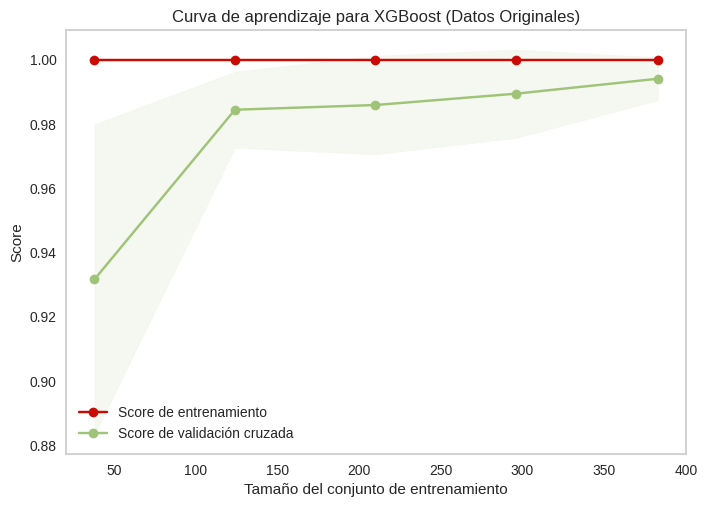

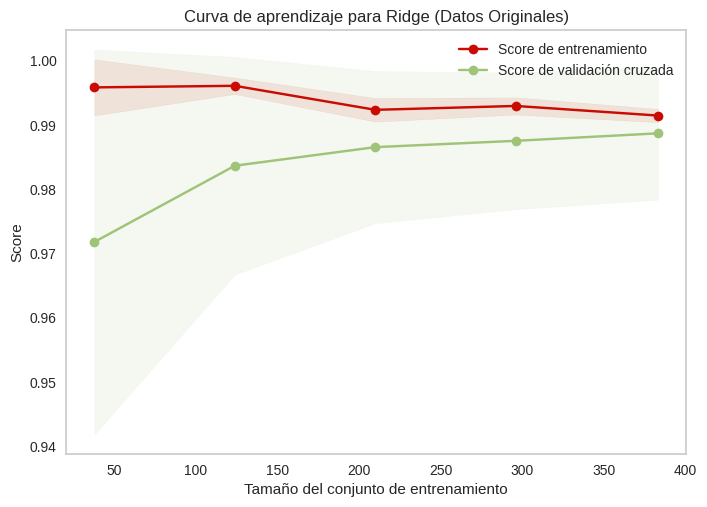

In [86]:
# Generar curvas de aprendizaje para XGBoost en datos originales
plot_learning_curve(best_xgb_model, "Curva de aprendizaje para XGBoost (Datos Originales)", X_train, y_train, cv=kfold)
plt.show()

# Generar curvas de aprendizaje para Ridge en datos originales
plot_learning_curve(best_ridge_model, "Curva de aprendizaje para Ridge (Datos Originales)", X_train, y_train, cv=kfold)
plt.show()


Conjunto de Datos NearMiss ```(QDA``` y ```Extra Trees)```.

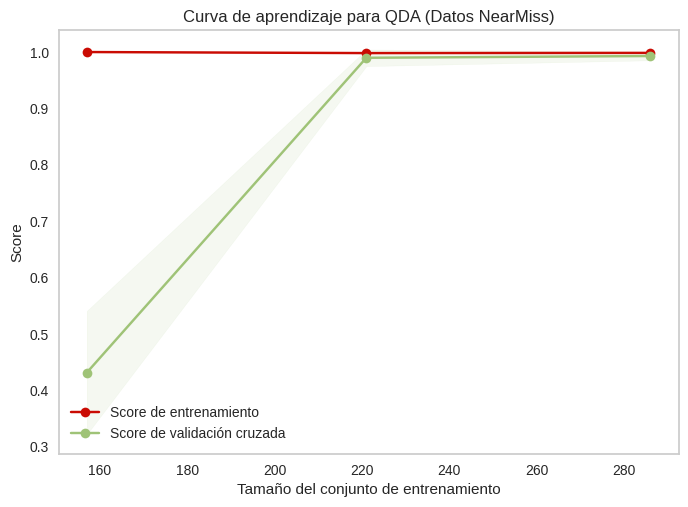

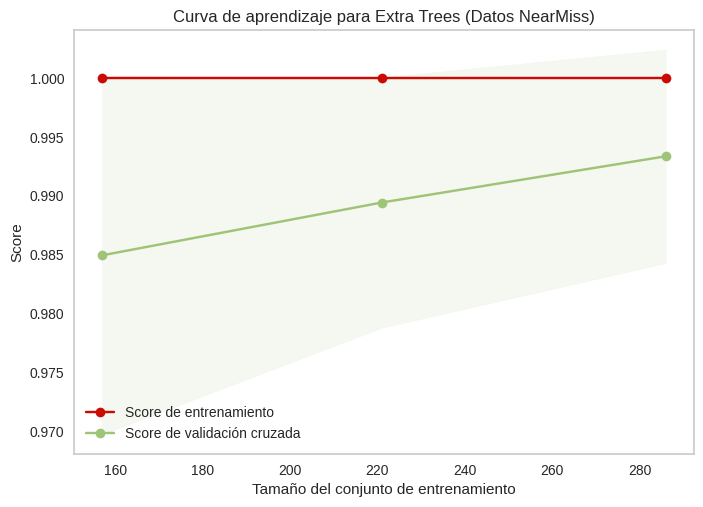

In [87]:
# Generar curvas de aprendizaje para QDA en datos NearMiss
plot_learning_curve(best_qda_model, "Curva de aprendizaje para QDA (Datos NearMiss)", X_resampled_nm, y_resampled_nm, cv=kfold)
plt.show()

# Generar curvas de aprendizaje para Extra Trees en datos NearMiss
plot_learning_curve(best_et_model, "Curva de aprendizaje para Extra Trees (Datos NearMiss)", X_resampled_nm, y_resampled_nm, cv=kfold)
plt.show()


Conjunto de Datos SMOTE ```(Extra Trees``` y ```XGBoost)```.

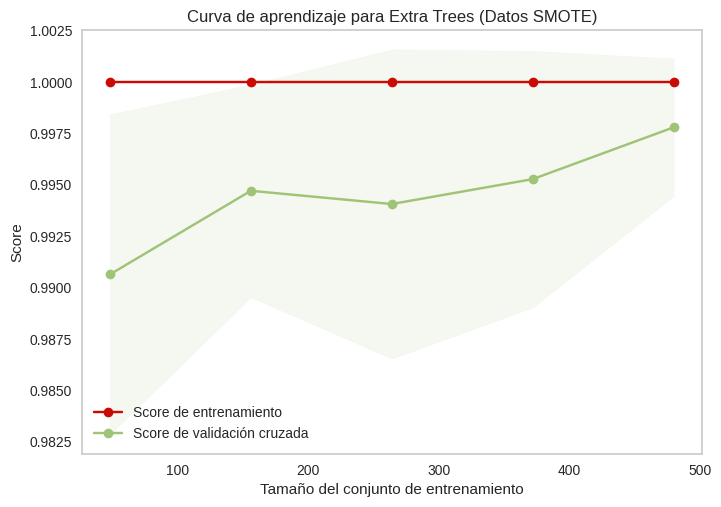

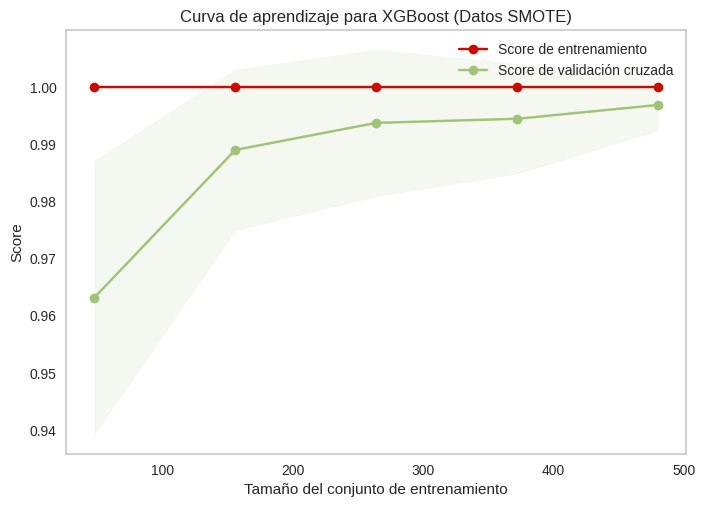

In [88]:
# Generar curvas de aprendizaje para Extra Trees en datos SMOTE
plot_learning_curve(best_et_model_smote, "Curva de aprendizaje para Extra Trees (Datos SMOTE)", X_resampled_smote, y_resampled_smote, cv=kfold)
plt.show()

# Generar curvas de aprendizaje para XGBoost en datos SMOTE
plot_learning_curve(best_xgb_model_smote, "Curva de aprendizaje para XGBoost (Datos SMOTE)", X_resampled_smote, y_resampled_smote, cv=kfold)
plt.show()


#### 13. Almacenamiento de los resultados
Almacenamiento de resultados de cada GridSearchCV en una lista de diccionarios

In [90]:
# Lista para almacenar los resultados
results = []

# Función para almacenar los resultados
def store_results(grid_search, model_name):
    for params, mean_test_score, std_test_score in zip(grid_search.cv_results_['params'],
                                                       grid_search.cv_results_['mean_test_score'],
                                                       grid_search.cv_results_['std_test_score']):
        results.append({
            'Model': model_name,
            'Params': params,
            'Mean Test Score': mean_test_score,
            'Std Test Score': std_test_score
        })

# Evaluación de modelos con hiperparámetros personalizados
# Datos Originales
store_results(xgb_grid, "XGBoost Original")
store_results(ridge_grid, "Ridge Original")

# Datos NearMiss
store_results(qda_grid, "QDA NearMiss")
store_results(et_grid, "Extra Trees NearMiss")

# Datos SMOTE
store_results(xgb_grid_smote, "XGBoost SMOTE")
store_results(et_grid_smote, "Extra Trees SMOTE")


*   Creacion de la Tabla de Comparación


DataFrame a partir de la lista de diccionarios

In [105]:
# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)

# Guardar el DataFrame como un archivo CSV
results_df.to_csv('resultados.csv', index=False)

# Mostrar la tabla
results_df




,Model,Params,Mean Test Score,Std Test Score
0,XGBoost Original,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.981801,0.020550
1,XGBoost Original,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.983324,0.019836
2,XGBoost Original,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.987444,0.015505
3,XGBoost Original,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.984034,0.019667
4,XGBoost Original,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.985185,0.018758
...,...,...,...,...
73,Extra Trees SMOTE,"{'max_features': 'sqrt', 'n_estimators': 200}",0.997370,0.004131
74,Extra Trees SMOTE,"{'max_features': 'sqrt', 'n_estimators': 300}",0.997512,0.003840
75,Extra Trees SMOTE,"{'max_features': 'log2', 'n_estimators': 100}",0.997726,0.003672
76,Extra Trees SMOTE,"{'max_features': 'log2', 'n_estimators': 200}",0.997869,0.003387


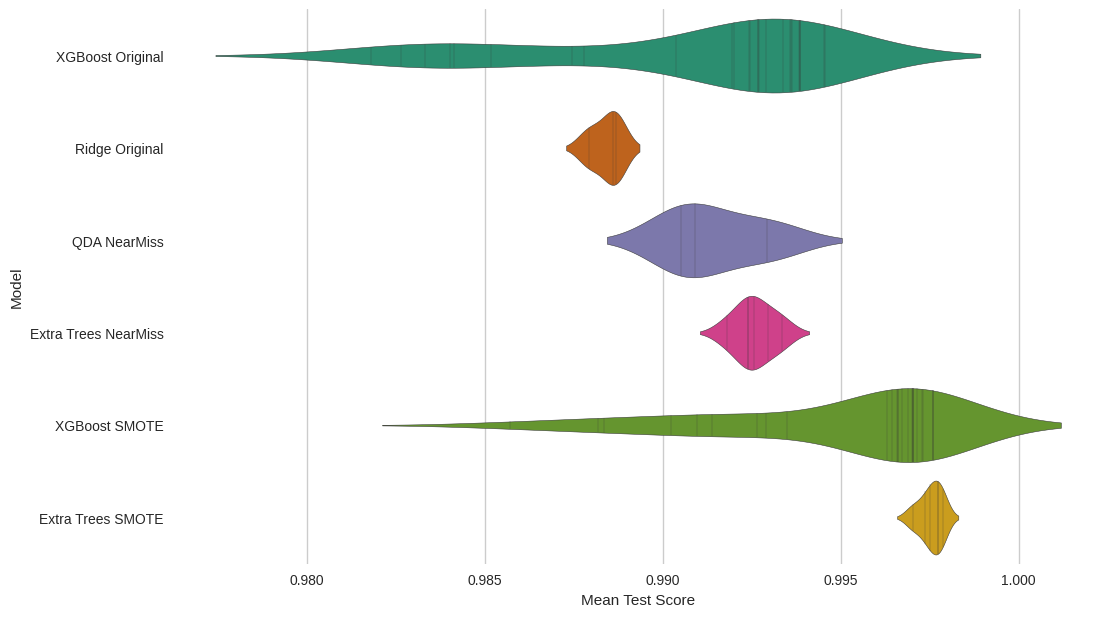

In [96]:
# @title Model vs Mean Test Score

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Mean Test Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

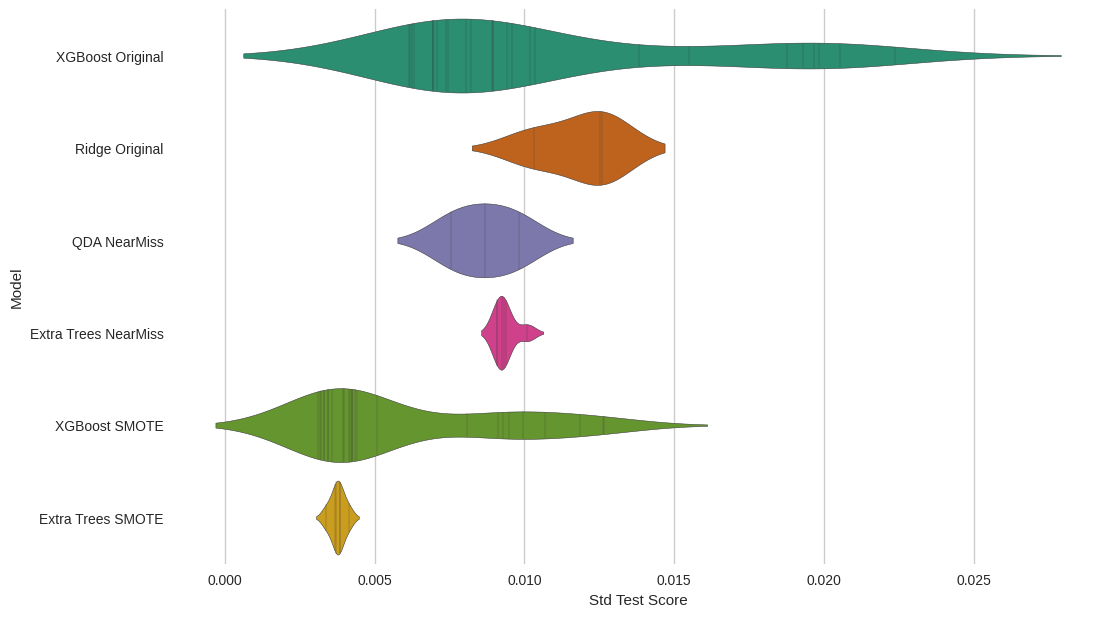

In [97]:
# @title Model vs Std Test Score

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Std Test Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Visualizar la tabla de comparación

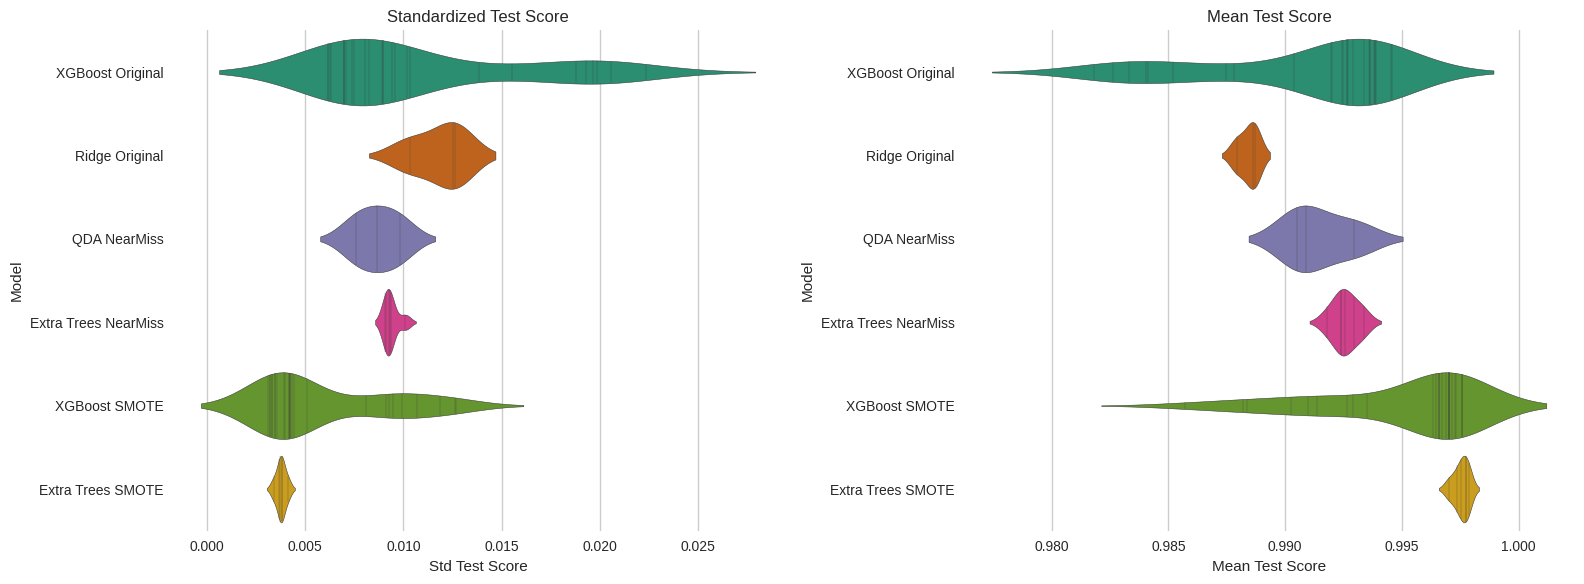

In [102]:
from matplotlib import pyplot as plt
import seaborn as sns

# Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Graficar el primer gráfico en el primer eje
sns.violinplot(data=results_df, x='Std Test Score', y='Model', inner='stick', palette='Dark2', ax=ax1)
ax1.set_title('Standardized Test Score')

# Graficar el segundo gráfico en el segundo eje
sns.violinplot(data=results_df, x='Mean Test Score', y='Model', inner='stick', palette='Dark2', ax=ax2)
ax2.set_title('Mean Test Score')

# Eliminar las espinas de ambos ejes
sns.despine(top=True, right=True, bottom=True, left=True, ax=ax1)
sns.despine(top=True, right=True, bottom=True, left=True, ax=ax2)

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [113]:
from tabulate import tabulate

# Filtra los datos para cada tipo de técnica
original_df = results_df[results_df['Model'].str.contains('Original')]
nearmiss_df = results_df[results_df['Model'].str.contains('NearMiss')]
smote_df = results_df[results_df['Model'].str.contains('SMOTE')]

# Formato para tabulate
tablefmt = "grid"

# DataFrames filtrados en tablas con tabulate
original_table = tabulate(original_df, headers='keys', tablefmt=tablefmt)
nearmiss_table = tabulate(nearmiss_df, headers='keys', tablefmt=tablefmt)
smote_table = tabulate(smote_df, headers='keys', tablefmt=tablefmt)

# Tablas formateadas
print("Tabla para datos originales:")
print(original_table)


Tabla para datos originales:
+----+------------------+--------------------------------------------------------------+-------------------+------------------+
|    | Model            | Params                                                       |   Mean Test Score |   Std Test Score |
+====+==================+==============================================================+===================+==================+
|  0 | XGBoost Original | {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100} |          0.981801 |       0.0205501  |
+----+------------------+--------------------------------------------------------------+-------------------+------------------+
|  1 | XGBoost Original | {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200} |          0.983324 |       0.0198364  |
+----+------------------+--------------------------------------------------------------+-------------------+------------------+
|  2 | XGBoost Original | {'learning_rate': 0.01, 'max_depth': 3, 'n_estima

In [114]:
print("\nTabla para NearMiss:")
print(nearmiss_table)


Tabla para NearMiss:
+----+----------------------+-----------------------------------------------+-------------------+------------------+
|    | Model                | Params                                        |   Mean Test Score |   Std Test Score |
+====+======================+===============================================+===================+==================+
| 30 | QDA NearMiss         | {'reg_param': 0.0}                            |          0.992943 |       0.00756415 |
+----+----------------------+-----------------------------------------------+-------------------+------------------+
| 31 | QDA NearMiss         | {'reg_param': 0.1}                            |          0.990911 |       0.00981011 |
+----+----------------------+-----------------------------------------------+-------------------+------------------+
| 32 | QDA NearMiss         | {'reg_param': 0.2}                            |          0.990521 |       0.00867481 |
+----+----------------------+-------------

In [121]:
print("\nTabla para SMOTE:")
print(smote_table)


Tabla para SMOTE:
+----+-------------------+--------------------------------------------------------------+-------------------+------------------+
|    | Model             | Params                                                       |   Mean Test Score |   Std Test Score |
+====+===================+==============================================================+===================+==================+
| 42 | XGBoost SMOTE     | {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100} |          0.985713 |       0.0126749  |
+----+-------------------+--------------------------------------------------------------+-------------------+------------------+
| 43 | XGBoost SMOTE     | {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200} |          0.990234 |       0.0118468  |
+----+-------------------+--------------------------------------------------------------+-------------------+------------------+
| 44 | XGBoost SMOTE     | {'learning_rate': 0.01, 'max_depth': 3, 'n_estimato